In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
# Path of the file to read.
games_path = 'E:/Desktop/JypiterLite/Streamchik/games.csv'
games_data = pd.read_csv(games_path)
gdc = games_data.copy()
gdc.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [115]:
# Combining the sales.
gdc['Sales_Total'] = gdc[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis = 1)
gdc = gdc.drop(columns = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'])
gdc.head()

,Name,Platform,Year_of_Release,Genre,Critic_Score,User_Score,Rating,Sales_Total
0,Wii Sports,Wii,2006.0,Sports,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,NaN,NaN,NaN,31.38


In [116]:
# Dropped games released before 2010 to reduce noise from outdated platforms and ensure analysis focuses on more recent, comparable data.
gdc = gdc[gdc['Year_of_Release'] >= 2010]
gdc.head()

,Name,Platform,Year_of_Release,Genre,Critic_Score,User_Score,Rating,Sales_Total
14,Kinect Adventures!,X360,2010.0,Misc,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,88.0,3.4,M,14.73


In [123]:
# Filling in the Critic_Score and User_Score values with mean of these columns.
gdc['Critic_Score'] = pd.to_numeric(gdc['Critic_Score'], errors = 'coerce')
gdc['User_Score'] = pd.to_numeric(gdc['User_Score'], errors = 'coerce')
Critic_Score_mean = gdc['Critic_Score'].mean().round()
User_Score_mean = gdc['User_Score'].mean().round()
gdc['Critic_Score'] = gdc['Critic_Score'].fillna(Critic_Score_mean)
gdc['User_Score'] = gdc['User_Score'].fillna(User_Score_mean)
gdc['Sales_Total'] = pd.to_numeric(gdc['Sales_Total'], errors = 'coerce')
gdc.head(5)

,Name,Platform,Year_of_Release,Genre,Critic_Score,User_Score,Rating,Sales_Total
14,Kinect Adventures!,X360,2010.0,Misc,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,70.0,7.0,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,88.0,3.4,M,14.73


<Axes: title={'center': 'Number of Game Releases per Genre per Year'}, xlabel='Year_of_Release'>

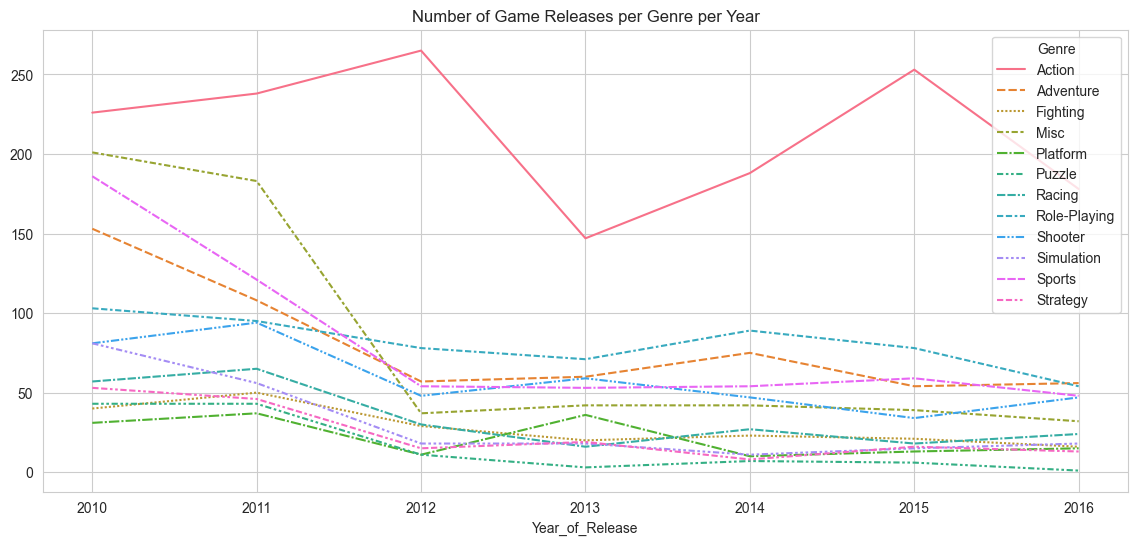

In [46]:
# Aggregating data to create a chart showing number of games of different genres released per year, starting from 2010.
year_genre_count = gdc[['Year_of_Release', 'Genre']].copy()
ygc = (year_genre_count.pivot_table(index = 'Year_of_Release', columns = 'Genre', aggfunc = 'size', fill_value = 0).sort_index().astype(int))
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
plt.title("Number of Game Releases per Genre per Year")
sns.lineplot(data = ygc)
#plt.savefig("genre_releases_per_year.png", dpi=300, bbox_inches="tight")


<Axes: title={'center': 'Average critic score by genre and platform'}, xlabel='Platform', ylabel='Genre'>

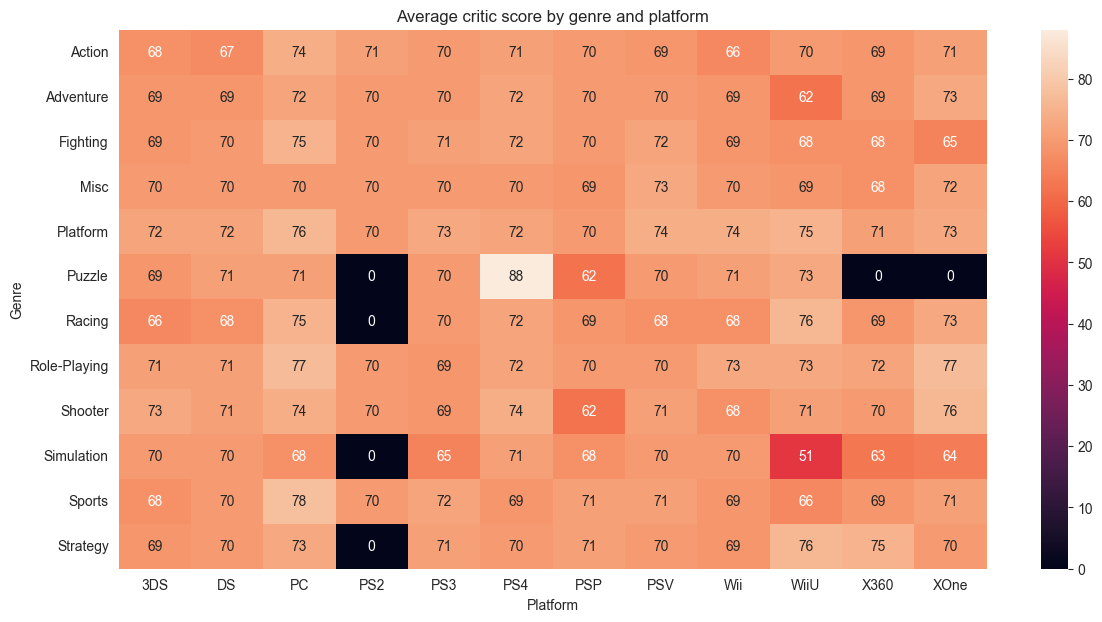

In [47]:
# Aggregating data to see the best combinations of Platform/Genre according to the critic scores.
avg_critic_score_by_platform = gdc[['Platform', 'Genre', 'Critic_Score']].copy()
avg_critic_score_by_platform = avg_critic_score_by_platform.groupby(['Platform','Genre']).mean().reset_index().round()
avg_critic_score_by_platform = avg_critic_score_by_platform.pivot(index = 'Genre', columns = 'Platform', values = 'Critic_Score')

# Due to lack of data on some Platform/Genre combinations filling the NaN with 0
avg_critic_score_by_platform = avg_critic_score_by_platform.fillna(0)
avg_critic_score_by_platform

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Average critic score by genre and platform")
sns.heatmap(data = avg_critic_score_by_platform, annot = True)
#plt.savefig("average critic score per platform.png", dpi=300, bbox_inches="tight")
#avg_critic_score_by_platform

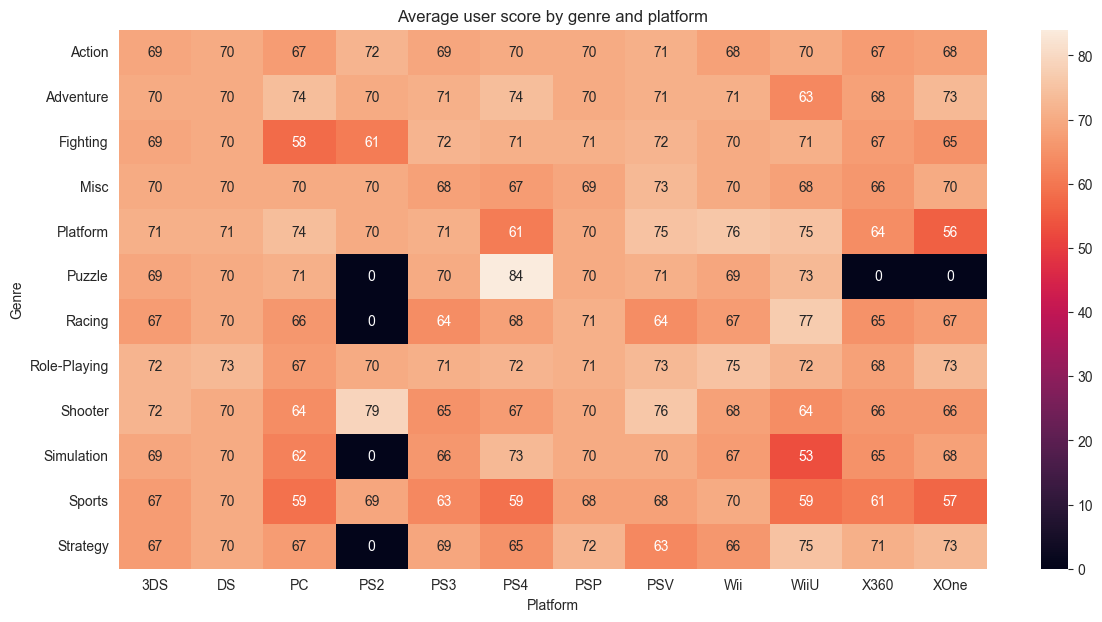

In [107]:
# Aggregating data to see the best combinations of Platform/Genre according to the user scores.
avg_user_score_by_platform = gdc[['Platform', 'Genre', 'User_Score']].copy()

# Since critic scores are double digit, and user scores are single digit, applying x10 to make it look similar and proceeding with further aggregation.
avg_user_score_by_platform['User_Score'] = avg_user_score_by_platform['User_Score'].apply(lambda x: x*10)
avg_user_score_by_platform = avg_user_score_by_platform.groupby(['Platform','Genre']).mean().reset_index().round()
avg_user_score_by_platform = avg_user_score_by_platform.pivot(index = 'Genre', columns = 'Platform', values = 'User_Score')

# Due to lack of data on some Platform/Genre combinations filling the NaN with 0
avg_user_score_by_platform = avg_user_score_by_platform.fillna(0)

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Average user score by genre and platform")
sns.heatmap(data = avg_user_score_by_platform, annot = True)
#plt.savefig("average user score per platform.png", dpi=300, bbox_inches="tight")

<Axes: title={'center': 'Total sales by genre and platform'}, xlabel='Platform', ylabel='Genre'>

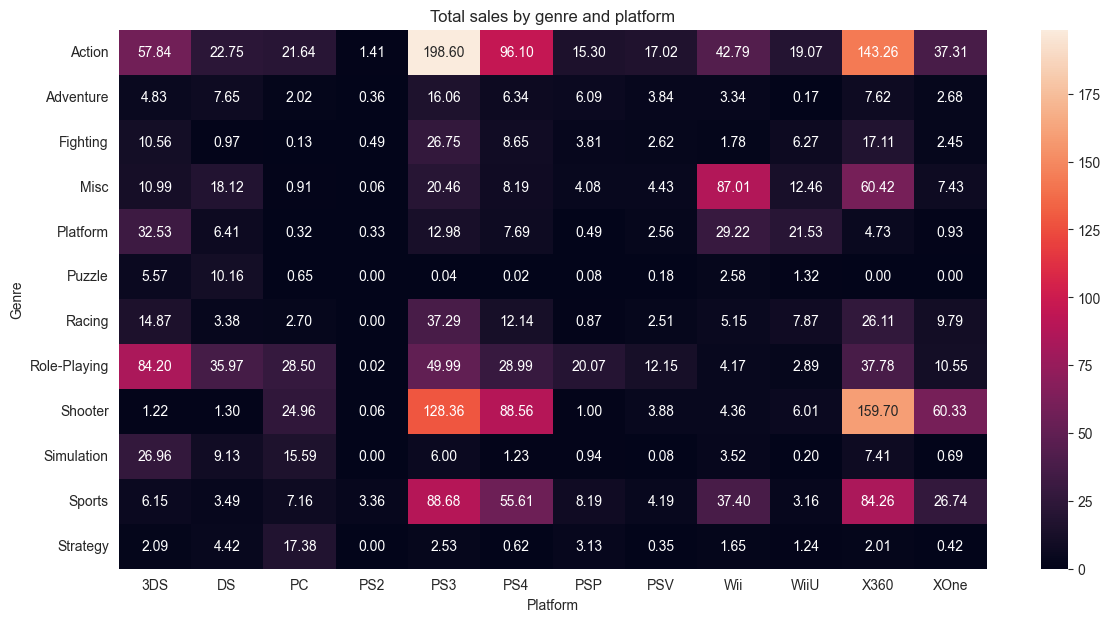

In [124]:
# Aggregating data to see the best combinations of Platform/Genre according to the total sales number.
sum_sale_numbers = gdc.copy()
sum_sale_numbers = sum_sale_numbers.drop(columns = ['Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'])
sum_sale_numbers = sum_sale_numbers.groupby(['Platform','Genre']).sum().reset_index()

# Due to lack of data on some Platform/Genre combinations filling the NaN with 0
sum_sale_numbers = sum_sale_numbers.pivot(index = 'Genre', columns = 'Platform', values = 'Sales_Total').fillna(0)
#sum_sale_numbers

# Heatmap
plt.figure(figsize=(14,7))
plt.title("Total sales by genre and platform")
sns.heatmap(data = sum_sale_numbers, annot = True, fmt='.2f')
#plt.savefig("Total sales by genre and platform", dpi=300, bbox_inches="tight")

<Axes: title={'center': 'Total games released by platform'}, xlabel='Platform', ylabel='count'>

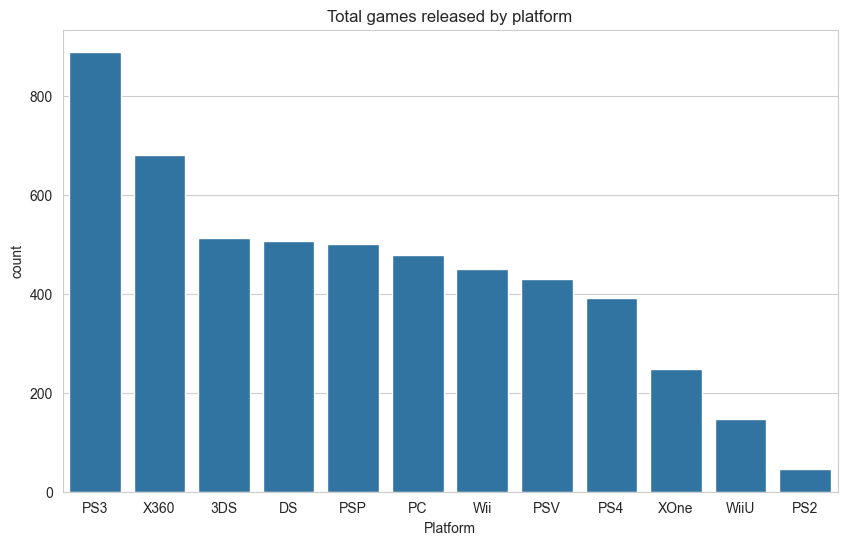

In [50]:
# Aggregating data to see the most popular platforms overall based on number of games released on them.
pop_platf = gdc[['Platform']].copy()
pop_platf = pop_platf.value_counts().reset_index()

#Setting up a bar chart
plt.figure(figsize=(10,6))
plt.title("Total games released by platform")
sns.barplot(x=pop_platf['Platform'], y=pop_platf['count'])
#plt.savefig("Total games released by platform", dpi=300, bbox_inches="tight")

<Axes: title={'center': 'Popularity of platforms over the years'}, xlabel='Year_of_Release'>

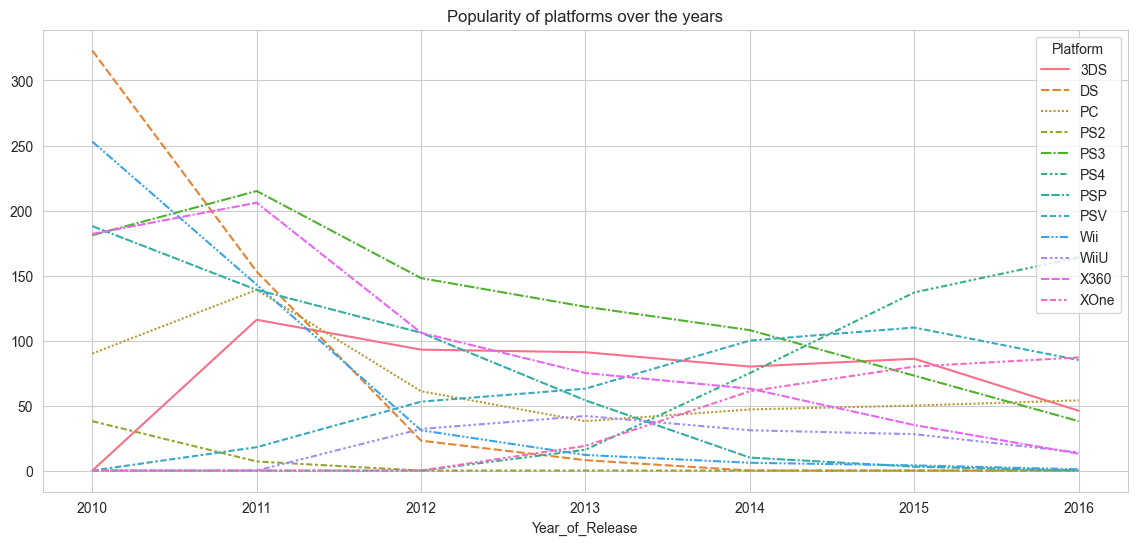

In [51]:
# Aggregating data to see the popularity of platforms over the years.
platf_years = gdc[['Platform', 'Year_of_Release']].copy()
platf_years = platf_years.value_counts().reset_index()
platf_years = platf_years.pivot(index = 'Year_of_Release', columns = 'Platform', values = 'count').fillna(0)

# Creating a line chart.
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
plt.title("Popularity of platforms over the years")
sns.lineplot(data = platf_years)
#plt.savefig("Popularity of platforms over the years", dpi=300, bbox_inches="tight")

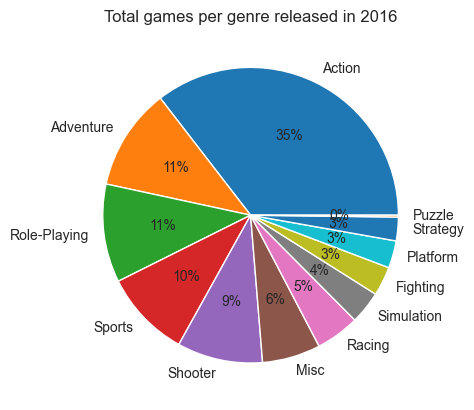

In [102]:
# Since our task involves analyzing trends for next year, number of games released per genre summarized to 2016 period (previous year).
ygc_task = year_genre_count[year_genre_count['Year_of_Release'] > 2015]
ygc_task = ygc_task['Genre'].value_counts()
ygc_task.plot(kind='pie', autopct='%1.0f%%', ylabel = '')
plt.title('Total games per genre released in 2016')
#plt.savefig('Total games per genre released in 2016', dpi=300, bbox_inches="tight")